# Submitted By: Ahmed Islam
# Assignment 11
# Hope To Skills
# Free Artificial Intelligence Course

# Installing Required Libraries


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

#1. Loading Required Packages

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score


#2. Loading and Split the data into x_train, y_train, x_test and y_test.

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
#spliting the dataset into Train Test set
(x_train,y_train),(x_test,y_test)  = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


### 1. Display the sample images from x_train

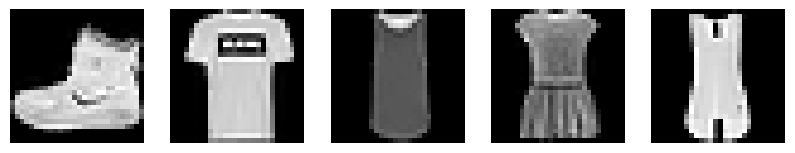

In [4]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

### 2. Display the shape of x_train and y_train

In [5]:
# Display the shape of x_train and y_train
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


#3. Displaying The Dataset


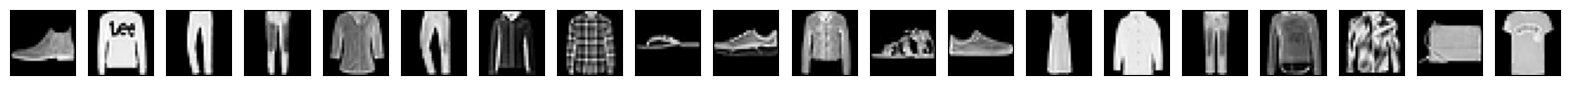

In [6]:
#number of images to be display
n=20
#plot figure size
plt.figure(figsize=(20,4))
#loop for each image displaying

for i in range(n):
    ax= plt.subplot(2, n, i+1) #subplot (a smaller section of the figure) where the image will be displayed.
    plt.imshow(x_test[i].reshape(28,28))

    #set color black and white
    plt.gray()

    #hiding x and y labels

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

plt.close()


#4. Flattening the Images


### 1. Reshape the images from 28x28 to 784-dimension vector.

In [7]:
#Reshape the Training and testing  data

x_train= x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [8]:
# After Flattening now the shape of dataset is

x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#5. Data Scaling

### 1. Convert the data into float 32 type
### 2. Scale the data by dividing x_train and y_train by 255

In [9]:
# Convert the data to float32 type and scale by dividing by 255
# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype('float32')/255.0



### 3.   Display the shape of x_train after scaling




In [10]:
# Display shapes after scaling

print("x_train shape (after scaling):", x_train.shape)
print("y_train shape (after scaling):", y_train.shape)

x_train shape (after scaling): (60000, 784)
y_train shape (after scaling): (60000,)


# One Hot Encoding

In [11]:
#number of classes

num_classes= 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("New Y_train shape {},\n New y_test shape{}".format(y_train.shape, y_test.shape))

New Y_train shape (60000, 10),
 New y_test shape(10000, 10)


# 6. Define the hyper parameters for the neural networks

In [20]:
# Learning rate
learning_rate = 0.001

# Set the number of complete passes through the dataset during training
num_epochs = 40

# Specify the number of data samples to process in each batch
batch_size = 200

# Define the input size for each data sample (e.g., image pixels)
input_size = 784

# number of neurons in the first hidden layer
hidden_layer1 = 500

# number of neurons in the Second hidden layer
hidden_layer2 = 150

# number of neurons in the Third hidden layer
hidden_layer3= 100

# number of neurons in the fourth hidden layer
hidden_layer4= 50

# number of neurons in the fourth hidden layer
#hidden_layer5= 30

# Define the total number of classes/categories in the dataset
num_classes = 10       # 10 classes in Fashion MNIST

#7. Define the structure of your neural network

In [21]:
#building model

model= Sequential()

model.add(Dense(hidden_layer1, input_dim = input_size, activation= 'relu'))
model.add(Dense(hidden_layer2, activation= 'relu'))
model.add(Dense(hidden_layer3, activation= 'relu'))
model.add(Dense(hidden_layer4, activation= 'relu'))
#model.add(Dense(hidden_layer5, activation= 'relu'))

model.add(Dense(num_classes, activation='softmax'))


#8. Model Compile

In [22]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer= 'sgd')

# 9. Model summary

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 150)               75150     
                                                                 
 dense_8 (Dense)             (None, 100)               15100     
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
Total params: 488,310
Trainable params: 488,310
Non-trainable params: 0
_________________________________________________________________


#10. Train the Neural Network

In [24]:
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose= 1)


Epoch 1/40
300/300 [==============================] - 6s 17ms/step - loss: 1.3685 - accuracy: 0.5818
Epoch 2/40
300/300 [==============================] - 4s 14ms/step - loss: 0.7229 - accuracy: 0.7504
Epoch 3/40
300/300 [==============================] - 5s 15ms/step - loss: 0.6104 - accuracy: 0.7864
Epoch 4/40
300/300 [==============================] - 5s 18ms/step - loss: 0.5515 - accuracy: 0.8054
Epoch 5/40
300/300 [==============================] - 4s 14ms/step - loss: 0.5164 - accuracy: 0.8181
Epoch 6/40
300/300 [==============================] - 4s 15ms/step - loss: 0.4899 - accuracy: 0.8271
Epoch 7/40
300/300 [==============================] - 5s 18ms/step - loss: 0.4734 - accuracy: 0.8325
Epoch 8/40
300/300 [==============================] - 4s 14ms/step - loss: 0.4544 - accuracy: 0.8398
Epoch 9/40
300/300 [==============================] - 4s 13ms/step - loss: 0.4403 - accuracy: 0.8447
Epoch 10/40
300/300 [==============================] - 5s 17ms/step - loss: 0.4325 - accura

#11. Testing The Model

### 1. Accuracy of the model

In [25]:
y_pred_prob= model.predict(x_test, verbose=0)
y_pred= np.where(y_pred_prob >0.5, 1, 0)

test_accuracy= round(accuracy_score(y_pred,y_test)*100,2)

In [26]:
# Compare training and testing accuracy
train_accuracy = round(history.history['accuracy'][-1]*100,2)  # Get the last epoch's training accuracy
print(f"Training accuracy: {train_accuracy}% , Testing accuracy: {test_accuracy}%")

Training accuracy: 89.44% , Testing accuracy: 84.45%


### 2. Compare the training and testing accuracy and write you observation in the comments



The training accuracy is higher than the testing accuracy. This statement show that the model might be somewhat overfitting the training data. Model capturing more details. Achieving a perfect balance between training and testing accuracy is not always possible.

###3. Display the predicted labels along the input image.


In [27]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(5, 30)

# Select the first 20 samples from the test set for visualization
X_valid = x_test[0:10]
actual_labels = y_test[0:5]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 22ms/step


In [28]:
label_mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

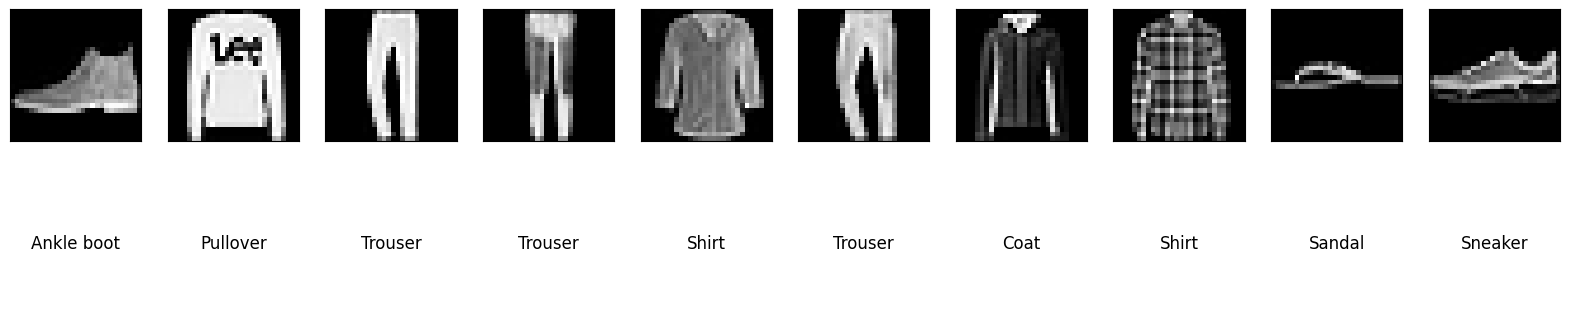

In [29]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted label
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    predicted_label = label_mapping[predicted_digit]
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, predicted_label, fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()
